In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt #para graficar dando especificaciones del gráfico

# Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('df-clean.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    8807 non-null   int64 
 1   show_id       8807 non-null   object
 2   type          8807 non-null   object
 3   title         8807 non-null   object
 4   director      8807 non-null   object
 5   cast          8807 non-null   object
 6   country       8807 non-null   object
 7   date_added    8807 non-null   object
 8   release_year  8807 non-null   int64 
 9   rating        8807 non-null   object
 10  duration      8807 non-null   object
 11  listed_in     8807 non-null   object
 12  description   8807 non-null   object
dtypes: int64(2), object(11)
memory usage: 894.6+ KB


In [3]:
df.sample(7).transpose()

,5018,115,1030,1326,8613,4235,2230
Unnamed: 0,5018,115,1030,1326,8613,4235,2230
show_id,s5019,s116,s1031,s1327,s8614,s4236,s2231
type,Movie,Movie,Movie,Movie,Movie,Movie,TV Show
title,Trailer Park Boys: Say Goodnight to the Bad Guys,Bright Star,Four Sisters Before the Wedding,Squared Love,Train to Busan,Gina Yashere: Skinny B*tch,Kissing Game
director,Mike Clattenburg,Jane Campion,Mae Czarina Cruz,Filip Zylber,Sang-ho Yeon,Director_Unkown,Director_Unkown
cast,"John Paul Tremblay, Robb Wells, John Dunsworth...","Abbie Cornish, Ben Whishaw, Paul Schneider, Ke...","Alexa Ilacad, Charlie Dizon, Gillian Vicencio,...","Adrianna Chlebicka, Mateusz Banasiuk, Agnieszk...","Gong Yoo, Yu-mi Jung, Dong-seok Ma, Soo-an Kim...",Gina Yashere,"Caio Horowicz, Iza Moreira, Michel Joelsas, De..."
country,Canada,"United Kingdom, Australia, France",Philippines,Poland,South Korea,United Kingdom,Brazil
date_added,"March 1, 2018","September 2, 2021","April 16, 2021","February 11, 2021","March 18, 2017","December 31, 2018","July 17, 2020"
release_year,2008,2009,2020,2021,2016,2008,2020
rating,TV-MA,PG,TV-MA,TV-14,TV-MA,TV-MA,TV-MA


In [4]:
df['description'].transpose().sample()

5281    Comedian and celebrity impersonator Joaquín Re...
Name: description, dtype: object

In [5]:
# quitar "Stopwords"
# Palabaras que no dan informacion relevante a la categoria en la cual clasificar

import nltk
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')

#print("stop_words: ", len(stop_words))
#print(stop_words)

def quitar_stop_words(texto): #función para quitar stopwords
    return " ".join([palabra for palabra in str(texto).split(' ') if palabra not in stop_words])

#para quitar signos de puntuación
import string
puntuacion_a_quitar = string.punctuation

print("puntuacion a quitar ---->", puntuacion_a_quitar)


puntuacion a quitar ----> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tona\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# poner todos los mensajes en min

df['clean_desc'] = df['description'].str.lower()

df.head().transpose()


,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
show_id,s1,s2,s3,s4,s5
type,Movie,TV Show,TV Show,TV Show,TV Show
title,Dick Johnson Is Dead,Blood & Water,Ganglands,Jailbirds New Orleans,Kota Factory
director,Kirsten Johnson,Director_Unkown,Julien Leclercq,Director_Unkown,Director_Unkown
cast,Cast_Unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Cast_Unkown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
country,United States,South Africa,Country_Unknown,Country_Unknown,India
date_added,"September 25, 2021","September 24, 2021","September 24, 2021","September 24, 2021","September 24, 2021"
release_year,2020,2021,2021,2021,2021
rating,PG-13,TV-MA,TV-MA,TV-MA,TV-MA


In [9]:
df['clean_desc1']=df['clean_desc'].apply(lambda x: quitar_stop_words(x))
df.sample(2).transpose()

,7272,7990
Unnamed: 0,7272,7990
show_id,s7273,s7991
type,Movie,Movie
title,Le K Benzema,SGT. Will Gardner
director,"Damien Piscarel, Florent Bodin",Max Martini
cast,Karim Benzema,"Max Martini, Omari Hardwick, Lily Rabe, Elisab..."
country,France,United States
date_added,"May 1, 2018","May 19, 2019"
release_year,2017,2019
rating,TV-14,TV-MA


In [10]:
print(type(puntuacion_a_quitar))

def quitar_punctuation(texto):
    aux1 = str.maketrans('','', puntuacion_a_quitar)
    #print(aux1)
    return texto.translate(aux1)
 
# maketrans
# https://www.w3schools.com/python/ref_string_maketrans.asp
# string.maketrans(x, y, z) ---> z (opcional, parametros a remover)

df['clean_desc2'] = df['clean_desc1'].apply(lambda x: quitar_punctuation(x))

df.head().transpose()
# "myspace.com/lookthunder" ------> "myspacecomlookthunder"

<class 'str'>


,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
show_id,s1,s2,s3,s4,s5
type,Movie,TV Show,TV Show,TV Show,TV Show
title,Dick Johnson Is Dead,Blood & Water,Ganglands,Jailbirds New Orleans,Kota Factory
director,Kirsten Johnson,Director_Unkown,Julien Leclercq,Director_Unkown,Director_Unkown
cast,Cast_Unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Cast_Unkown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
country,United States,South Africa,Country_Unknown,Country_Unknown,India
date_added,"September 25, 2021","September 24, 2021","September 24, 2021","September 24, 2021","September 24, 2021"
release_year,2020,2021,2021,2021,2021
rating,PG-13,TV-MA,TV-MA,TV-MA,TV-MA


In [11]:
# -------- Palabras mas frecuentes
from collections import Counter

contador = Counter()
#print(contador)

for texto in df['clean_desc2'].values:
    for palabra in texto.split(' '):
        contador[palabra] += 1

print(contador.most_common()[0:10])

[('life', 774), ('young', 728), ('new', 699), ('–', 605), ('family', 570), ('love', 497), ('two', 495), ('man', 491), ('world', 491), ('friends', 460)]


In [12]:

palabras_poco_comunes = [w for (w, wc) in contador.most_common()[-10:]]
#print(palabras_poco_comunes)

contador_poco_comunes = contador.most_common()[-10:]
#print(contador_poco_comunes.most_common()[0:10])
contador_poco_comunes

[('zak', 1),
 ('bermuda', 1),
 ('clearance', 1),
 ('partys', 1),
 ('kashaf', 1),
 ('zaroon', 1),
 ('sadist', 1),
 ('franciscos', 1),
 ('dorky', 1),
 ('roughneck', 1)]

In [12]:
from textblob import TextBlob
import pandas as pd

# Análisis de sentimiento básico
df['sentiment'] = df['clean_desc2'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['subjectivity'] = df['clean_desc2'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Clasificar sentimientos
df['sentiment_category'] = pd.cut(df['sentiment'], 
                                 bins=[-1, -0.1, 0.1, 1],
                                 labels=['Negativo', 'Neutral', 'Positivo'])
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
show_id,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10
type,Movie,TV Show,TV Show,TV Show,TV Show,TV Show,Movie,Movie,TV Show,Movie
title,Dick Johnson Is Dead,Blood & Water,Ganglands,Jailbirds New Orleans,Kota Factory,Midnight Mass,My Little Pony: A New Generation,Sankofa,The Great British Baking Show,The Starling
director,Kirsten Johnson,Director_Unkown,Julien Leclercq,Director_Unkown,Director_Unkown,Mike Flanagan,"Robert Cullen, José Luis Ucha",Haile Gerima,Andy Devonshire,Theodore Melfi
cast,Cast_Unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Cast_Unkown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","Kate Siegel, Zach Gilford, Hamish Linklater, H...","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...","Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","Melissa McCarthy, Chris O'Dowd, Kevin Kline, T..."
country,United States,South Africa,Country_Unknown,Country_Unknown,India,Country_Unknown,Country_Unknown,"United States, Ghana, Burkina Faso, United Kin...",United Kingdom,United States
date_added,"September 25, 2021","September 24, 2021","September 24, 2021","September 24, 2021","September 24, 2021","September 24, 2021","September 24, 2021","September 24, 2021","September 24, 2021","September 24, 2021"
release_year,2020,2021,2021,2021,2021,2021,2021,1993,2021,2021
rating,PG-13,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,PG,TV-MA,TV-14,PG-13


In [13]:
df['sentiment_category'].value_counts()/len(df)*100

sentiment_category
Neutral     42.386738
Positivo    36.028159
Negativo    21.051436
Name: count, dtype: float64

In [16]:
#(df['subjectivity'].value_counts()/len(df)) * 100 #por porcentaje 

subjectivity
0.000000    14.159192
1.000000     5.506983
0.500000     5.007380
0.400000     3.349608
0.600000     2.361758
              ...    
0.348636     0.011355
0.215873     0.011355
0.408658     0.011355
0.760714     0.011355
0.263636     0.011355
Name: count, Length: 1184, dtype: float64

In [15]:
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.decomposition import LatentDirichletAllocation
#import nltk
#from nltk.corpus import stopwords

#stop_words_en = stopwords.words('english')

#vectorizer = CountVectorizer(max_df=0.95, min_df=2, 
#                            stop_words=stop_words_en)
#dtm = vectorizer.fit_transform(df['description'])

# Modelado de temas
#lda = LatentDirichletAllocation(n_components=2, random_state=42)
#lda.fit(dtm)

# Mostrar temas
#for index, topic in enumerate(lda.components_):
#    print(f"Tema #{index}")
#    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
#    print("\n")

Tema #0
['based', 'group', 'story', 'war', 'team', 'one', 'life', 'world', 'series', 'documentary']


Tema #1
['two', 'must', 'friends', 'man', 'woman', 'family', 'love', 'life', 'new', 'young']




In [14]:
df.sample(4).transpose()

,4391,5533,8729,4664
Unnamed: 0,4391,5533,8729,4664
show_id,s4392,s5534,s8730,s4665
type,Movie,Movie,Movie,TV Show
title,Halkaa,Sandy Wexler,Where the Money Is,Age of Rebellion
director,Nila Madhab Panda,Steven Brill,Marek Kanievska,Peter Ho
cast,"Tathastu, Aryan Preet, Ranvir Shorey, Paoli Da...","Adam Sandler, Jennifer Hudson, Kevin James, Te...","Paul Newman, Linda Fiorentino, Dermot Mulroney...","Peter Ho, Jeanine Yang, Tammy Chen, Jason Tsou..."
country,India,United States,"Germany, United States, United Kingdom, Canada",Taiwan
date_added,"November 15, 2018","April 14, 2017","January 15, 2020","September 1, 2018"
release_year,2018,2017,2000,2018
rating,TV-14,TV-14,PG-13,TV-MA


In [15]:
df['clean_desc2'].head()

0    father nears end life filmmaker kirsten johnso...
1    crossing paths party cape town teen sets prove...
2    protect family powerful drug lord skilled thie...
3    feuds flirtations toilet talk go among incarce...
4    city coaching centers known train india’s fine...
Name: clean_desc2, dtype: object

In [16]:
df.loc[6000]['clean_desc2']

'jeffs straightandnarrow life changes abruptly buddies take birthday bash – night crucial med school interview'

In [32]:
df['tipo']=df['type'].apply(lambda x: 1 if x=='Movie' else 0)
df.sample(4).transpose()

,598,5929,5737,975
Unnamed: 0,598,5929,5737,975
show_id,s599,s5930,s5738,s976
type,Movie,Movie,Movie,Movie
title,The American,Print the Legend,I Am the Pretty Thing That Lives in the House,Shadow and Bone - The Afterparty
director,Anton Corbijn,"Luis Lopez, Clay Tweel",Osgood Perkins,Director_Unkown
cast,"George Clooney, Violante Placido, Thekla Reute...",Cast_Unkown,"Ruth Wilson, Bob Balaban, Lucy Boynton, Paula ...","David Spade, London Hughes, Fortune Feimster, ..."
country,"United States, United Kingdom",United States,"Canada, United States",United States
date_added,"July 1, 2021","September 26, 2014","October 28, 2016","April 24, 2021"
release_year,2010,2014,2016,2021
rating,R,TV-14,TV-14,TV-14


---------------------  MACHINE  LEARNING   --------------------------------

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [21]:

#numeric_cols=df.select_dtypes(include=['int32','int64','float64']).columns
#categorical_cols=df.select_dtypes(include=['object']).columns

#print(categorical_cols)
#print(numeric_cols)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description', 'clean_desc',
       'clean_desc1', 'clean_desc2'],
      dtype='object')
Index(['Unnamed: 0', 'release_year', 'sentiment', 'subjectivity'], dtype='object')


In [22]:

# Para variables numéricas
#imputer_numeric = SimpleImputer(strategy='median')
#scaler = StandardScaler()

# Aplicar secuencialmente
##df_numeric_imputed = imputer_numeric.fit_transform(df[numeric_cols])
#df_numeric_scaled = scaler.fit_transform(df_numeric_imputed)

# Para variables categóricas
#imputer_categorical = SimpleImputer(strategy='constant', fill_value='missing')
#onehot = OneHotEncoder(handle_unknown='ignore')

#df_categorical_imputed = imputer_categorical.fit_transform(df[categorical_cols])
#df_categorical_encoded = onehot.fit_transform(df_categorical_imputed)

In [43]:
df['sentimiento_num']=df['sentiment_category'].apply(lambda x: 1 if x == 'Positivo' else (-1 if x == 'Negativo' else 0))

#X_train['Gender'] = X_train['Gender'].apply(lambda x: 0 if x == 'Male' else (1 if x == 'Female' else 2))
df.sample(3).transpose()

,3703,4694,4526
Unnamed: 0,3703,4694,4526
show_id,s3704,s4695,s4527
type,Movie,Movie,Movie
title,El testigo,Toilet: Ek Prem Katha,Pulang
director,Kate Horne,Shree Narayan Singh,Kabir Bhatia
cast,Jesús Abad Colorado,"Akshay Kumar, Bhumi Pednekar, Divyendu Sharma,...","Puteri Aishah, Remy Ishak, Alvin Wong"
country,"Colombia, Peru, United Kingdom",India,Malaysia
date_added,"June 28, 2019","August 21, 2018","October 8, 2018"
release_year,2018,2017,2018
rating,TV-14,TV-14,TV-14


In [44]:

tfidf = TfidfVectorizer().fit_transform(df['clean_desc2'])
tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 127212 stored elements and shape (8807, 20808)>

In [45]:
df.sample(3).transpose()

,8502,7374,3347
Unnamed: 0,8502,7374,3347
show_id,s8503,s7375,s3348
type,Movie,Movie,Movie
title,The Seven Five,Madre,The King
director,Tiller Russell,Aaron Burns,David Michôd
cast,Cast_Unkown,"Daniela Ramírez, Cristobal Tapia Montt, Aida, ...","Timothée Chalamet, Joel Edgerton, Robert Patti..."
country,United States,Chile,"United Kingdom, Hungary, Australia"
date_added,"April 14, 2017","August 26, 2017","November 1, 2019"
release_year,2014,2016,2019
rating,R,TV-MA,R


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          8807 non-null   int64   
 1   show_id             8807 non-null   object  
 2   type                8807 non-null   object  
 3   title               8807 non-null   object  
 4   director            8807 non-null   object  
 5   cast                8807 non-null   object  
 6   country             8807 non-null   object  
 7   date_added          8807 non-null   object  
 8   release_year        8807 non-null   int64   
 9   rating              8807 non-null   object  
 10  duration            8807 non-null   object  
 11  listed_in           8807 non-null   object  
 12  description         8807 non-null   object  
 13  clean_desc          8807 non-null   object  
 14  clean_desc1         8807 non-null   object  
 15  clean_desc2         8807 non-null   ob

In [35]:
tfX_train, tfX_test, tfy_train, tfy_test = train_test_split(tfidf, 
                                                            df['tipo'], 
                                                            test_size = 0.2)

In [36]:
print(tfX_train.shape)  # valores vectorizados
print(tfX_test.shape)   # valores vectorizados
print(tfy_train.shape)  # sus etiquetas
print(tfy_test.shape)   # sus etiquetas

tfy_test

(7045, 20808)
(1762, 20808)
(7045,)
(1762,)


5321    0
5709    1
7401    1
1294    0
2811    1
       ..
7567    1
353     1
1142    1
8117    0
2613    1
Name: tipo, Length: 1762, dtype: int64

In [37]:
mnb = MultinomialNB()
mnb.fit(tfX_train, tfy_train)

y_pred_mnb = mnb.predict(tfX_test)

In [38]:
print(y_pred_mnb)

[1 1 1 ... 1 1 1]


In [39]:
print(f'Accuracy score is : {accuracy_score(tfy_test, y_pred_mnb)}')

Accuracy score is : 0.720771850170261


In [40]:
matriz_conf = confusion_matrix(tfy_test, y_pred_mnb, labels = [1,0])

print(matriz_conf)

[[1239    4]
 [ 488   31]]


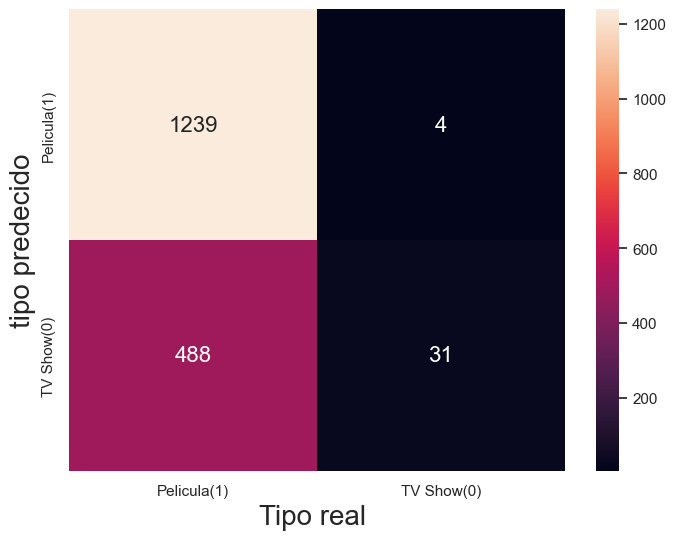

In [41]:
plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(matriz_conf, 
            xticklabels = ["Pelicula(1)", "TV Show(0)"], 
            yticklabels = ["Pelicula(1)", "TV Show(0)"], 
            annot = True, fmt='g', annot_kws = {'size': 16})     # "Keyword arguments"

plt.xlabel("Tipo real ", fontsize = 20)
plt.ylabel("tipo predecido", fontsize = 20)
plt.show()

In [57]:

dff=df.dropna()

tfidf = TfidfVectorizer().fit_transform(dff['clean_desc2'])
#tfidf


tfX_train, tfX_test, tfy_train, tfy_test = train_test_split(tfidf, 
                                                            dff['sentimiento_num'], 
                                                            test_size = 0.2)
#dff.info()

In [53]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          8807 non-null   int64   
 1   show_id             8807 non-null   object  
 2   type                8807 non-null   object  
 3   title               8807 non-null   object  
 4   director            8807 non-null   object  
 5   cast                8807 non-null   object  
 6   country             8807 non-null   object  
 7   date_added          8807 non-null   object  
 8   release_year        8807 non-null   int64   
 9   rating              8807 non-null   object  
 10  duration            8807 non-null   object  
 11  listed_in           8807 non-null   object  
 12  description         8807 non-null   object  
 13  clean_desc          8807 non-null   object  
 14  clean_desc1         8807 non-null   object  
 15  clean_desc2         8807 non-null   ob

In [58]:
print(tfX_train.shape)  # valores vectorizados
print(tfX_test.shape)   # valores vectorizados
print(tfy_train.shape)  # sus etiquetas
print(tfy_test.shape)   # sus etiquetas

tfy_test

(7008, 20738)
(1752, 20738)
(7008,)
(1752,)


1552    0
8753   -1
3236    0
2456    1
5858    0
       ..
8075   -1
3866    1
4765    1
97      1
324     0
Name: sentimiento_num, Length: 1752, dtype: category
Categories (3, int64): [-1 < 0 < 1]

In [59]:
mnb = MultinomialNB()
mnb.fit(tfX_train, tfy_train)

y_pred_mnb = mnb.predict(tfX_test)

print(y_pred_mnb)

print(f'Accuracy score is : {accuracy_score(tfy_test, y_pred_mnb)}')


[1 0 0 ... 0 1 0]
Accuracy score is : 0.555365296803653


In [65]:
matriz_conf2 = confusion_matrix(tfy_test, y_pred_mnb, labels = [1,0,-1])

print(matriz_conf2)

[[347 290   0]
 [114 619   1]
 [ 28 346   7]]


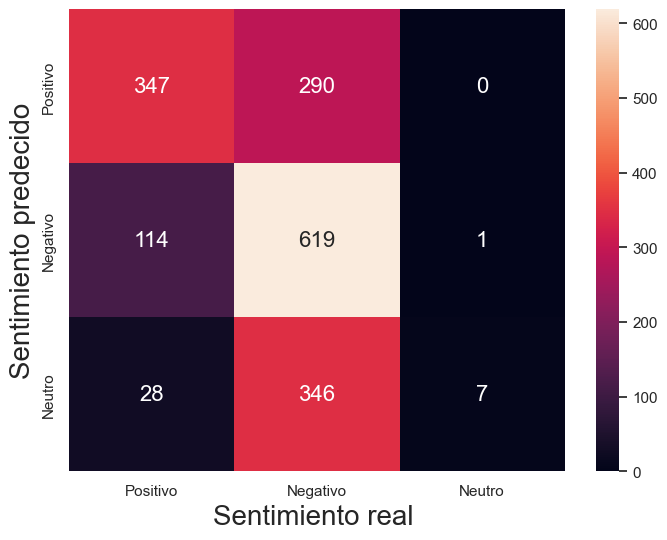

In [66]:
plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(matriz_conf2, 
            xticklabels = ["Positivo", "Negativo","Neutro"], 
            yticklabels = ["Positivo", "Negativo","Neutro"], 
            annot = True, fmt='g', annot_kws = {'size': 16})     # "Keyword arguments"

plt.xlabel("Sentimiento real ", fontsize = 20)
plt.ylabel("Sentimiento predecido", fontsize = 20)
plt.show()

---------------------- TF IDF scikit learn-------------------------

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(df['clean_desc2'])

print(type(tf_idf_vector), tf_idf_vector.shape)

<class 'scipy.sparse._csr.csr_matrix'> (8807, 20808)


In [50]:
tf_idf_array = tf_idf_vector.toarray()

print(tf_idf_array.shape)
tf_idf_array

(8807, 20808)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])